In [35]:
# Importing the useful stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Plotly is used for plotting the 3D cluster graph
import plotly as py
import plotly.graph_objs as go

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [21]:
# Reading the data
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [24]:
# Checking for null values
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<Figure size 1000x600 with 0 Axes>

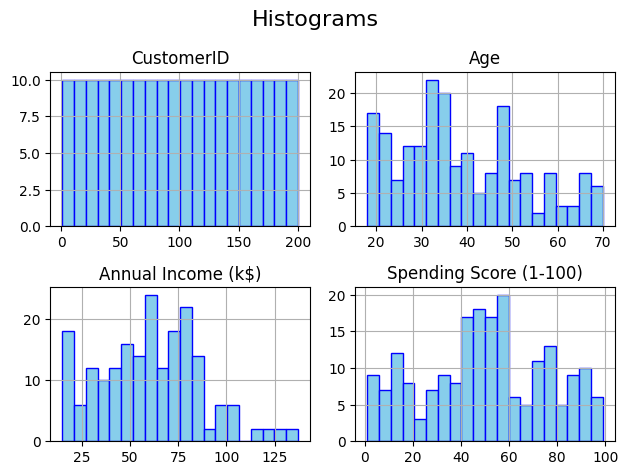

In [25]:
# Plotting histograms
plt.figure(figsize=(10, 6))
df.hist(color = 'skyblue', bins = 20, edgecolor = 'blue')
plt.suptitle("Histograms", fontsize = 16)
plt.tight_layout()
plt.show()

In [26]:
# Dropping out the unrequired columns: CustomerID and Gender
df1 = df.drop(labels =['CustomerID', 'Gender'], axis=1)
df1.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [27]:
inertia_list = []
n_clusters = range(1,11)
for i in range (1,11):
    num_clusters = i
    model = KMeans(n_clusters= num_clusters)
    model.fit(df1)
    inertia = model.inertia_
    inertia_list.append(inertia)

df_descision_clusters = pd.DataFrame({'N Clusters': n_clusters, 'Inertia': inertia_list})

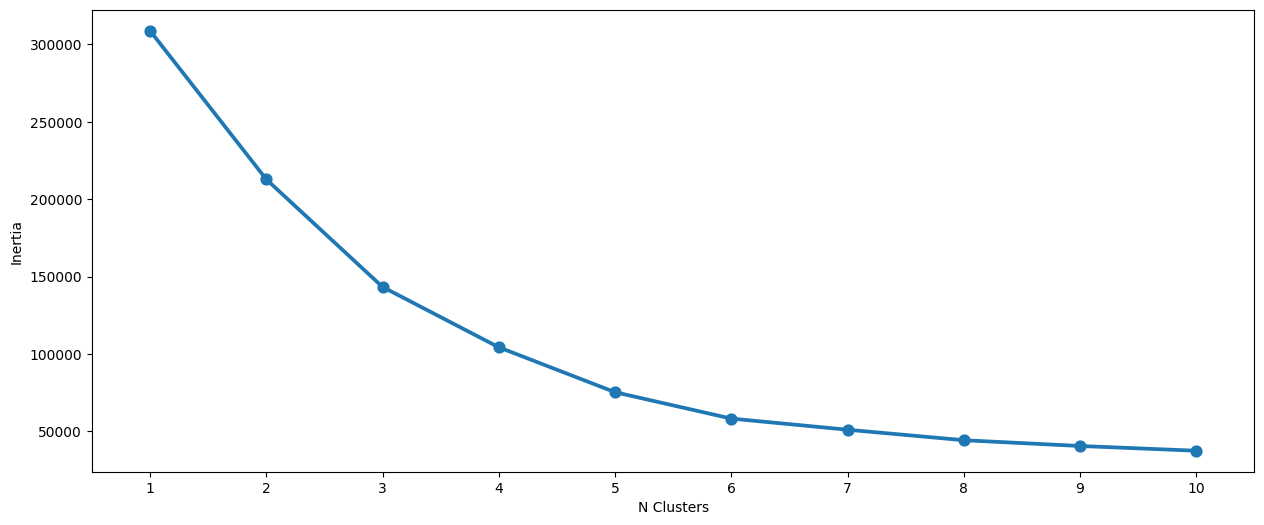

In [30]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.pointplot(data=df_descision_clusters, x='N Clusters', y='Inertia', ax=ax)
plt.show()

In [31]:
# Defining the model with n=5
model = KMeans(n_clusters=5)
model.fit(df1)

KMeans(n_clusters=5)

In [32]:
# Fitting the data in the model
labels1 = model.predict(df1)
print(labels1)
print(len(labels1))

[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 4 1 2 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 2 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1]
200


In [33]:
# Obtaining centroids
centroids = model.cluster_centers_
centroids

array([[45.2173913 , 26.30434783, 20.91304348],
       [32.69230769, 86.53846154, 82.12820513],
       [43.08860759, 55.29113924, 49.56962025],
       [25.52173913, 26.30434783, 78.56521739],
       [40.66666667, 87.75      , 17.58333333]])

In [34]:
# Adding the cluster groups to the main dataframe
df['Cluster Group'] = labels1
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster Group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0


In [38]:
# Plotting the 3D graph
KMeansDistribution = go.Scatter3d(
    x = df['Age'],
    y = df['Spending Score (1-100)'],
    z = df['Annual Income (k$)'],
    mode = 'markers',
    marker = dict(
        color = df['Cluster Group'],
        size = 10,
        line = dict(
            color = df['Cluster Group'],
            width = 12
        ),
        opacity = 0.8
    )
)
data = [KMeansDistribution]
layout = go.Layout(
    title = 'Clusters',
    scene = dict(
        xaxis = dict(title = 'Age'),
        yaxis = dict(title = 'Spending Score'),
        zaxis = dict(title = 'Annual income')
    )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)